**NAME : Saurabh Ashok Satpute**

LGM VIP: Data Science Internship

1.Beginner Level Task -Stock Market Prediction And Forecasting Using Stacked LSTM

Language-Python

Software-Google Colab

Dataset-https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

**Reading the Dataset**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")


In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Data Sorting**

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df=data.sort_values(by='Date')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


**Visualization**

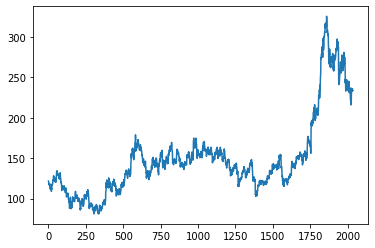

In [ ]:
plt.plot(df['Close'])


In [ ]:
dff=df['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

**Min Max Scaler**

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**Spliting the Dataset**

In [ ]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

**convert an array of values into a dataset matrix**

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

**Spliting Data into Train and Test**

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)


(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)


(510, 100)
(510,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Creating the LSTM Model**

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


Epoch 1/60
19/19 [==============================] - 18s 451ms/step - loss: 0.0117 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 3s 166ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 3s 164ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/60
19/19 [==============================] - 5s 266ms/step - loss: 9.3727e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 5s 262ms/step - loss: 8.5821e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 5s 271ms/step - loss: 8.4459e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 234ms/step - loss: 7.9800e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 166ms/step - loss: 7.7715e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 169ms/step - loss: 7.4708e-04 - val_loss: 0.0011
Epoch 10/60
19/19 [==============================] - 3s 167ms/step - loss: 

**Prediction**

In [ ]:
test_predict=model.predict(X_test)

In [ ]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[142.32152 ],
       [142.44022 ],
       [141.41821 ],
       [138.502   ],
       [136.85216 ],
       [136.662   ],
       [138.29752 ],
       [140.09102 ],
       [140.22801 ],
       [139.38809 ],
       [138.90381 ],
       [140.2884  ],
       [141.34998 ],
       [143.06465 ],
       [145.33986 ],
       [142.8837  ],
       [139.93214 ],
       [139.74072 ],
       [140.96675 ],
       [146.75467 ],
       [151.45174 ],
       [152.96347 ],
       [152.35672 ],
       [149.6618  ],
       [149.68127 ],
       [150.10419 ],
       [150.94354 ],
       [152.81508 ],
       [153.3605  ],
       [152.932   ],
       [153.09111 ],
       [151.79622 ],
       [148.28566 ],
       [142.25377 ],
       [139.06068 ],
       [138.81459 ],
       [139.51396 ],
       [138.56743 ],
       [135.6285  ],
       [131.35713 ],
       [128.80911 ],
       [128.08199 ],
       [126.336174],
       [125.67335 ],
       [123.61024 ],
       [120.80914 ],
       [120.16462 ],
       [120.1

**Calculating performance**

In [ ]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.03499840480260059